# Doc2vec 

In [179]:
import random
import numpy as np
import pandas as pd
import torch

In [ ]:
corpus = [
    'king is a strong man', 
    'queen is a wise woman', 
    'boy is a young man',
    'girl is a young woman',
    'prince is a young king',
    'princess is a young queen',
    'man is strong', 
    'woman is pretty',
    'prince is a boy will be king',
    'princess is a girl will be queen'
]

In [181]:
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

In [182]:
corpus = remove_stop_words(document)

In [183]:
corpus

['The future king the prince',
 'The prince strong man',
 'The princess beautiful woman',
 'A boy man',
 'king strong man',
 'queen wise woman',
 'boy young man',
 'girl young woman',
 'prince young king',
 'princess young queen',
 'man strong',
 'woman pretty']

In [184]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words)

In [185]:
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

data = []
for idx, sentence in enumerate(corpus):
    for word in sentence.split():
        data.append([idx, word])

In [186]:
word2int

{'man': 0,
 'princess': 1,
 'A': 2,
 'wise': 3,
 'beautiful': 4,
 'girl': 5,
 'strong': 6,
 'young': 7,
 'queen': 8,
 'the': 9,
 'boy': 10,
 'king': 11,
 'future': 12,
 'The': 13,
 'woman': 14,
 'pretty': 15,
 'prince': 16}

In [187]:
df = pd.DataFrame(data, columns = ['pid', 'label'])
df.head(8)

,pid,label
0,0,The
1,0,future
2,0,king
3,0,the
4,0,prince
5,1,The
6,1,prince
7,1,strong


In [188]:
ONE_HOT_DIM_DOC = len(corpus)
ONE_HOT_DIM_DOC

12

In [189]:
ONE_HOT_DIM_WORD = len(words)
ONE_HOT_DIM_WORD

17

In [190]:
# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index, ONE_HOT_DIM):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

In [191]:
X = [] # pid
Y = [] # target word

for x, y in zip(df['pid'], df['label']):
    X.append(to_one_hot_encoding(x, ONE_HOT_DIM_DOC))
    Y.append(to_one_hot_encoding(word2int[ y ], ONE_HOT_DIM_WORD))

In [192]:
# convert them to numpy arrays
X = np.asarray(X)
y = np.asarray(Y)

In [193]:
X[0], y[0]


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]))

In [194]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    features_tensor = torch.tensor(features, dtype=torch.float32)
    labels_tensor = torch.tensor(labels, dtype=torch.float32)
    for i in range(0, num_examples, batch_size):
        
        batch_indices = indices[i: min(i + batch_size, num_examples)]
        yield features_tensor[batch_indices], labels_tensor[batch_indices]

In [195]:
batch_size = 10

for X, y in data_iter(batch_size, X, y):
    print(X, '\n', y)
    break

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]) 
 tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.

In [196]:
num_hiddens = 10

W1 = torch.nn.Parameter(torch.randn(ONE_HOT_DIM_DOC, num_hiddens) * 0.01)
W2 = torch.nn.Parameter(torch.randn(num_hiddens, ONE_HOT_DIM_WORD) * 0.01)

params = [W1, W2]


In [197]:
import torch.nn.functional as F

def net(X):
    a1 = torch.matmul(X, W1)
    a2 = torch.matmul(a1, W2)
    return F.softmax(a2, dim=1)

In [198]:
import torch.nn as nn

num_epochs = 10
lr = 0.1
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params, lr=lr)

for epoch in range(num_epochs):
    for X_batch, y_batch in data_iter(batch_size, X, y):
        optimizer.zero_grad()
        y_hat = net(X_batch)
        # y_batch is one-hot, convert to class indices
        y_indices = torch.argmax(y_batch, dim=1)
        l = loss_fn(y_hat, y_indices)
        l.backward()
        optimizer.step()

C:\Users\morri\AppData\Local\Temp\ipykernel_8048\1927967654.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features_tensor = torch.tensor(features, dtype=torch.float32)
C:\Users\morri\AppData\Local\Temp\ipykernel_8048\1927967654.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels_tensor = torch.tensor(labels, dtype=torch.float32)


In [199]:
vectors = W1.detach().numpy()
vectors[0:5]

array([[ 1.9221915e-01,  3.0991036e-01, -9.0667474e-01, -3.6014199e-01,
        -2.5803211e-01, -8.4999584e-02,  9.0760142e-01,  8.9642000e-01,
        -7.3314220e-01, -9.0362185e-01],
       [-2.1474209e-01,  2.6787081e-01, -6.7898548e-01, -6.5867996e-01,
        -6.3347507e-01, -5.6659013e-01,  8.8655752e-01, -8.6509979e-01,
        -8.7951452e-01, -7.2552681e-01],
       [ 9.2074877e-01, -3.9633107e-01,  3.0415606e-01, -8.9519644e-01,
        -9.0292025e-01, -4.6940887e-01,  8.9467293e-01,  6.7807823e-01,
         8.7365824e-01, -6.6312206e-01],
       [ 8.7033482e-03, -8.5617685e-05, -5.1956498e-03, -7.3663853e-03,
        -4.6421676e-03, -4.0476220e-03, -6.4149001e-03, -5.7750475e-03,
         3.1996681e-03, -2.0045710e-03],
       [-8.6646801e-01, -8.8322687e-01,  8.7209982e-01, -6.4485335e-01,
         8.7795818e-01,  8.3233863e-01, -8.5785985e-01,  6.9384378e-01,
        -8.8064843e-01, -7.1214706e-01]], dtype=float32)

In [200]:
p2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'])
p2v_df['para'] = corpus
p2v_df = p2v_df[['para', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']]
p2v_df

,para,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,The future king the prince,0.192219,0.309910,-0.906675,-0.360142,-0.258032,-0.085000,0.907601,0.896420,-0.733142,-0.903622
1,The prince strong man,-0.214742,0.267871,-0.678985,-0.658680,-0.633475,-0.566590,0.886558,-0.865100,-0.879515,-0.725527
2,The princess beautiful woman,0.920749,-0.396331,0.304156,-0.895196,-0.902920,-0.469409,0.894673,0.678078,0.873658,-0.663122
3,A boy man,0.008703,-0.000086,-0.005196,-0.007366,-0.004642,-0.004048,-0.006415,-0.005775,0.003200,-0.002005
4,king strong man,-0.866468,-0.883227,0.872100,-0.644853,0.877958,0.832339,-0.857860,0.693844,-0.880648,-0.712147
5,queen wise woman,0.011501,-0.010382,0.013785,-0.001610,-0.009002,-0.004958,0.003284,-0.002711,0.027491,-0.002599
6,boy young man,0.004750,0.006437,-0.015151,-0.005156,0.011108,-0.011918,0.002594,-0.003357,-0.005823,0.001681
7,girl young woman,-0.869943,0.254721,0.038112,-0.691524,0.895000,-0.409181,0.898074,0.672505,0.120715,-0.670012
8,prince young king,0.193984,0.323436,-0.897601,-0.379379,0.602371,0.276059,0.702339,0.912964,-0.644553,-0.891804
9,princess young queen,0.924806,0.856307,-0.545359,-0.872968,0.880427,-0.558037,-0.911100,-0.901379,-0.886304,0.880507


In [201]:
from sklearn.metrics.pairwise import cosine_similarity

In [202]:
x = p2v_df.iloc[0:, 1:]
y = p2v_df.iloc[0:, 1:]
sim = cosine_similarity(x,y)
sim

array([[ 1.0000001 ,  0.56002766,  0.37067387, -0.02863863, -0.0311126 ,
        -0.37129748,  0.36405233,  0.45874137,  0.88774705, -0.13220547,
         0.16173983,  0.45840156],
       [ 0.56002766,  0.99999994,  0.16843139,  0.2686024 , -0.23822264,
        -0.28435156,  0.42909184,  0.2210004 ,  0.32774228,  0.150477  ,
        -0.09048892,  0.21741332],
       [ 0.37067387,  0.16843139,  1.0000001 ,  0.3481183 , -0.23044956,
         0.6830859 , -0.14905402,  0.19860332,  0.153481  , -0.35784295,
         0.09594608,  0.1942895 ],
       [-0.02863863,  0.2686024 ,  0.3481183 ,  0.99999994, -0.33526373,
         0.31197694,  0.3165561 , -0.3895912 , -0.14267637,  0.49273157,
        -0.6245593 , -0.39753821],
       [-0.0311126 , -0.23822264, -0.23044956, -0.33526373,  0.9999999 ,
        -0.28596973, -0.31337094,  0.29458356,  0.192028  , -0.12525806,
         0.14080939,  0.29209116],
       [-0.37129748, -0.28435156,  0.6830859 ,  0.31197694, -0.28596973,
         1.        , -

In [203]:
sim.shape

(12, 12)

In [204]:
for line in document:
    print(line)

The future king is the prince
The prince is a strong man
The princess is a beautiful woman
A boy will be a man
king is a strong man
queen is a wise woman
boy is a young man
girl is a young woman
prince is a young king
princess is a young queen
man is strong
woman is pretty


In [205]:
for row in range(sim.shape[0]):
    src = p2v_df.iloc[[row]]['para'].to_string(index=False)
    tmp = np.argsort(sim[row])
    tgt = p2v_df.iloc[[tmp[0]]]['para'].to_string(index=False)
    print(f'{src} -> {tgt}')

The future king the prince -> queen wise woman
The prince strong man -> queen wise woman
The princess beautiful woman -> princess young queen
A boy man -> man strong
king strong man -> A boy man
queen wise woman -> prince young king
boy young man -> man strong
girl young woman -> A boy man
prince young king -> queen wise woman
princess young queen -> man strong
man strong -> princess young queen
woman pretty -> A boy man


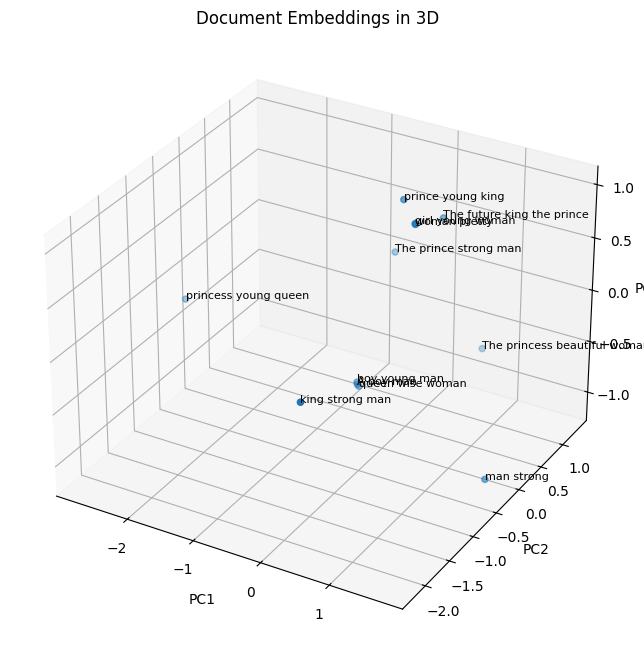

In [206]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# Use W1 as the learned document vectors (shape: [10, 10])
# Reduce vectors to 3D
pca = PCA(n_components=3)
vectors_3d = pca.fit_transform(vectors)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vectors_3d[:, 0], vectors_3d[:, 1], vectors_3d[:, 2])

# Annotate points with document text
for i, para in enumerate(corpus):
    ax.text(vectors_3d[i, 0], vectors_3d[i, 1], vectors_3d[i, 2], para, size=8)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Document Embeddings in 3D')
plt.show()


In [ ]:
print(vectors.shape)

array([[ 1.92219153e-01,  3.09910357e-01, -9.06674743e-01,
        -3.60141993e-01, -2.58032113e-01, -8.49995837e-02,
         9.07601416e-01,  8.96420002e-01, -7.33142197e-01,
        -9.03621852e-01],
       [-2.14742094e-01,  2.67870814e-01, -6.78985476e-01,
        -6.58679962e-01, -6.33475065e-01, -5.66590130e-01,
         8.86557519e-01, -8.65099788e-01, -8.79514515e-01,
        -7.25526810e-01],
       [ 9.20748770e-01, -3.96331072e-01,  3.04156065e-01,
        -8.95196438e-01, -9.02920246e-01, -4.69408870e-01,
         8.94672930e-01,  6.78078234e-01,  8.73658240e-01,
        -6.63122058e-01],
       [ 8.70334823e-03, -8.56176848e-05, -5.19564981e-03,
        -7.36638531e-03, -4.64216759e-03, -4.04762197e-03,
        -6.41490007e-03, -5.77504747e-03,  3.19966814e-03,
        -2.00457103e-03],
       [-8.66468012e-01, -8.83226871e-01,  8.72099817e-01,
        -6.44853354e-01,  8.77958179e-01,  8.32338631e-01,
        -8.57859850e-01,  6.93843782e-01, -8.80648434e-01,
        -7.

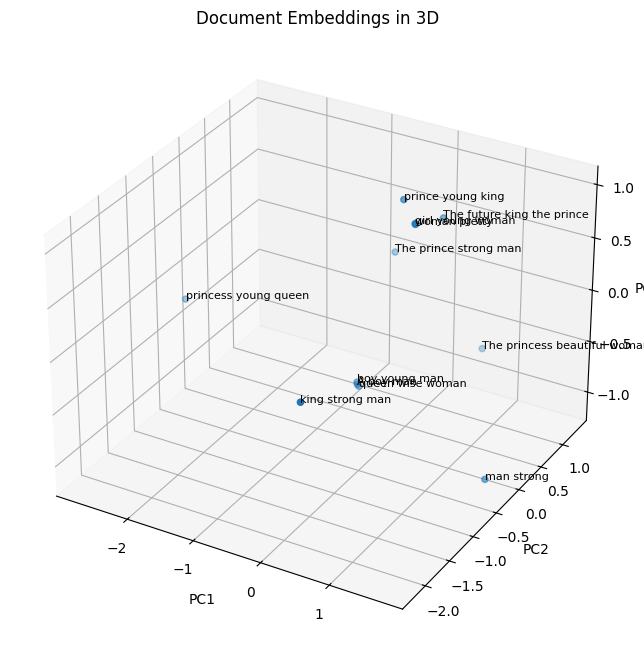

In [ ]:
plt.figure(figsize=(10, 10))
for i, para in enumerate(corpus):
    x, y = vectors[i, 0], vectors[i, 1]
    plt.scatter(x, y)
    plt.annotate(para, (x, y), fontsize=8)

plt.title('Document Embeddings (First 2 Dimensions)')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.savefig('assets/after_training.jpg')
plt.show()
